Develop RNN model for Cryptocurrency pricing prediction or text sentiment analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = df_train.iloc[:, 1: 2].values

In [ ]:
training_set.shape

(1509, 1)

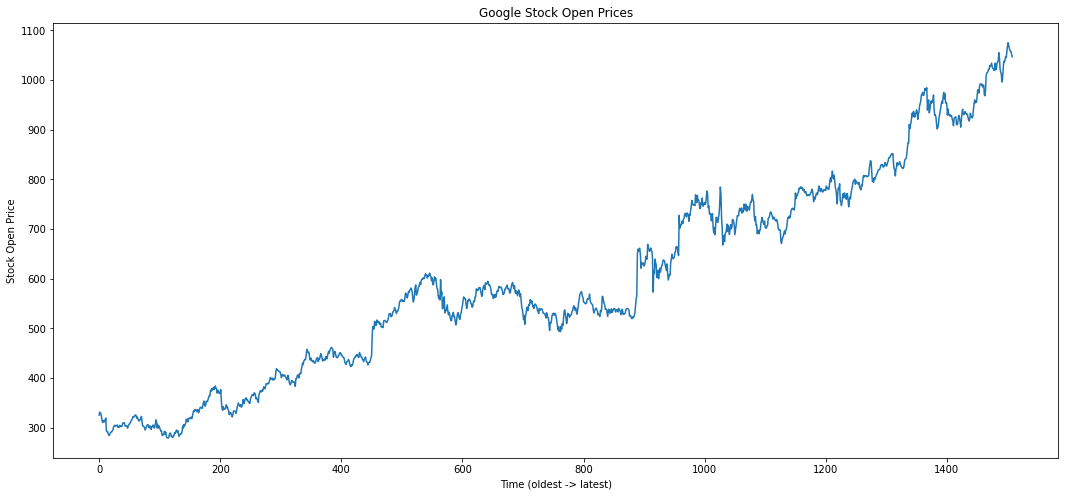

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(df_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [ ]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
y_train.shape

(1449,)

In [ ]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1449, 60, 1)

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 20)

Epoch 1/20
46/46 [==============================] - 14s 141ms/step - loss: 0.0260
Epoch 2/20
46/46 [==============================] - 6s 125ms/step - loss: 0.0034
Epoch 3/20
46/46 [==============================] - 6s 129ms/step - loss: 0.0032
Epoch 4/20
46/46 [==============================] - 7s 149ms/step - loss: 0.0034
Epoch 5/20
46/46 [==============================] - 8s 172ms/step - loss: 0.0032
Epoch 6/20
46/46 [==============================] - 9s 202ms/step - loss: 0.0029
Epoch 7/20
46/46 [==============================] - 8s 162ms/step - loss: 0.0032
Epoch 8/20
46/46 [==============================] - 6s 123ms/step - loss: 0.0027
Epoch 9/20
46/46 [==============================] - 6s 121ms/step - loss: 0.0031
Epoch 10/20
46/46 [==============================] - 8s 172ms/step - loss: 0.0025
Epoch 11/20
46/46 [==============================] - 8s 164ms/step - loss: 0.0029
Epoch 12/20
46/46 [==============================] - 7s 155ms/step - loss: 0.0027
Epoch 13/20
46/46 [=====

In [ ]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
real_stock_price = df_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [ ]:
df_total = pd.concat((df_train['Open'], df_test['Open']), 
                          axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

In [ ]:
len(inputs)

185

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(125, 60, 1)

In [ ]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 3s 31ms/step


In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

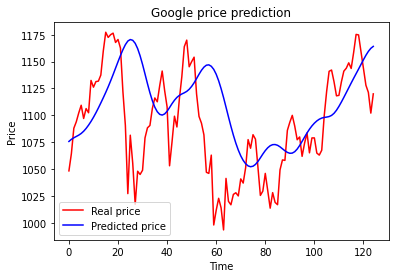

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()